In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
from coloring_problem import obtain_colors, create_adjacent_matrix

In [3]:
def number_to_discrete_color(index, total_colors):
    cmap = plt.get_cmap('tab20', total_colors)
    rgba = cmap(index / total_colors)
    return mcolors.to_hex(rgba)

In [36]:
matriu, comarca_names = create_adjacent_matrix()

color_numbers = obtain_colors(matriu)


In [37]:
comarca_names, color_numbers

(['Alt Empordà',
  'Baix Empordà',
  "Pla de l'Estany",
  'Gironès',
  'Selva',
  'Garrotxa',
  'Ripollès'],
 [1, 2, 1, 0, 1, 2, 1])

In [11]:
# Load the shapefile (this path assumes you have the shapefile locally)
comarques_gdf = gpd.read_file('./divisions-administratives-v2r1-comarques-250000-20240701.shp')

In [38]:
# Get the unique numbers from the list and assign each a color
unique_numbers = list(set(color_numbers))
total_unique_colors = len(unique_numbers)

# Create a dictionary mapping each unique number to a color
number_color_mapping = {num: number_to_discrete_color(i, total_unique_colors) for i, num in enumerate(unique_numbers)}

# Now map each comarca name to its corresponding color based on its number
comarca_colors = {name: number_color_mapping[num] for name, num in zip(comarca_names, color_numbers)}

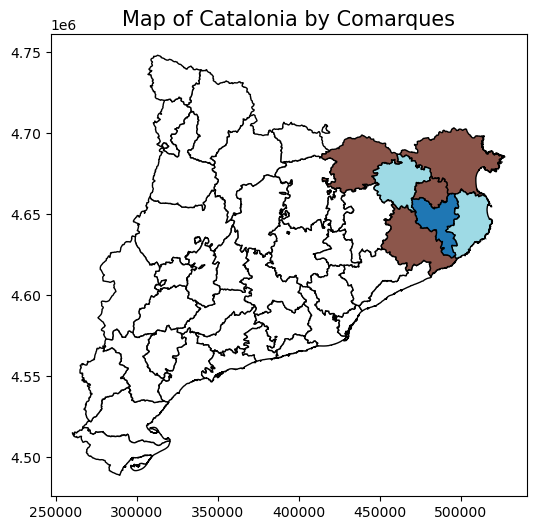

In [39]:
# Create a new column for colors based on the comarca names
comarques_gdf['color'] = comarques_gdf['NOMCOMAR'].map(comarca_colors).fillna('#FFFFFF')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
comarques_gdf.plot(ax=ax, color=comarques_gdf['color'], edgecolor='black')

# Optional: Customize the title and layout
ax.set_title("Map of Catalonia by Comarques", fontsize=15)
plt.show()